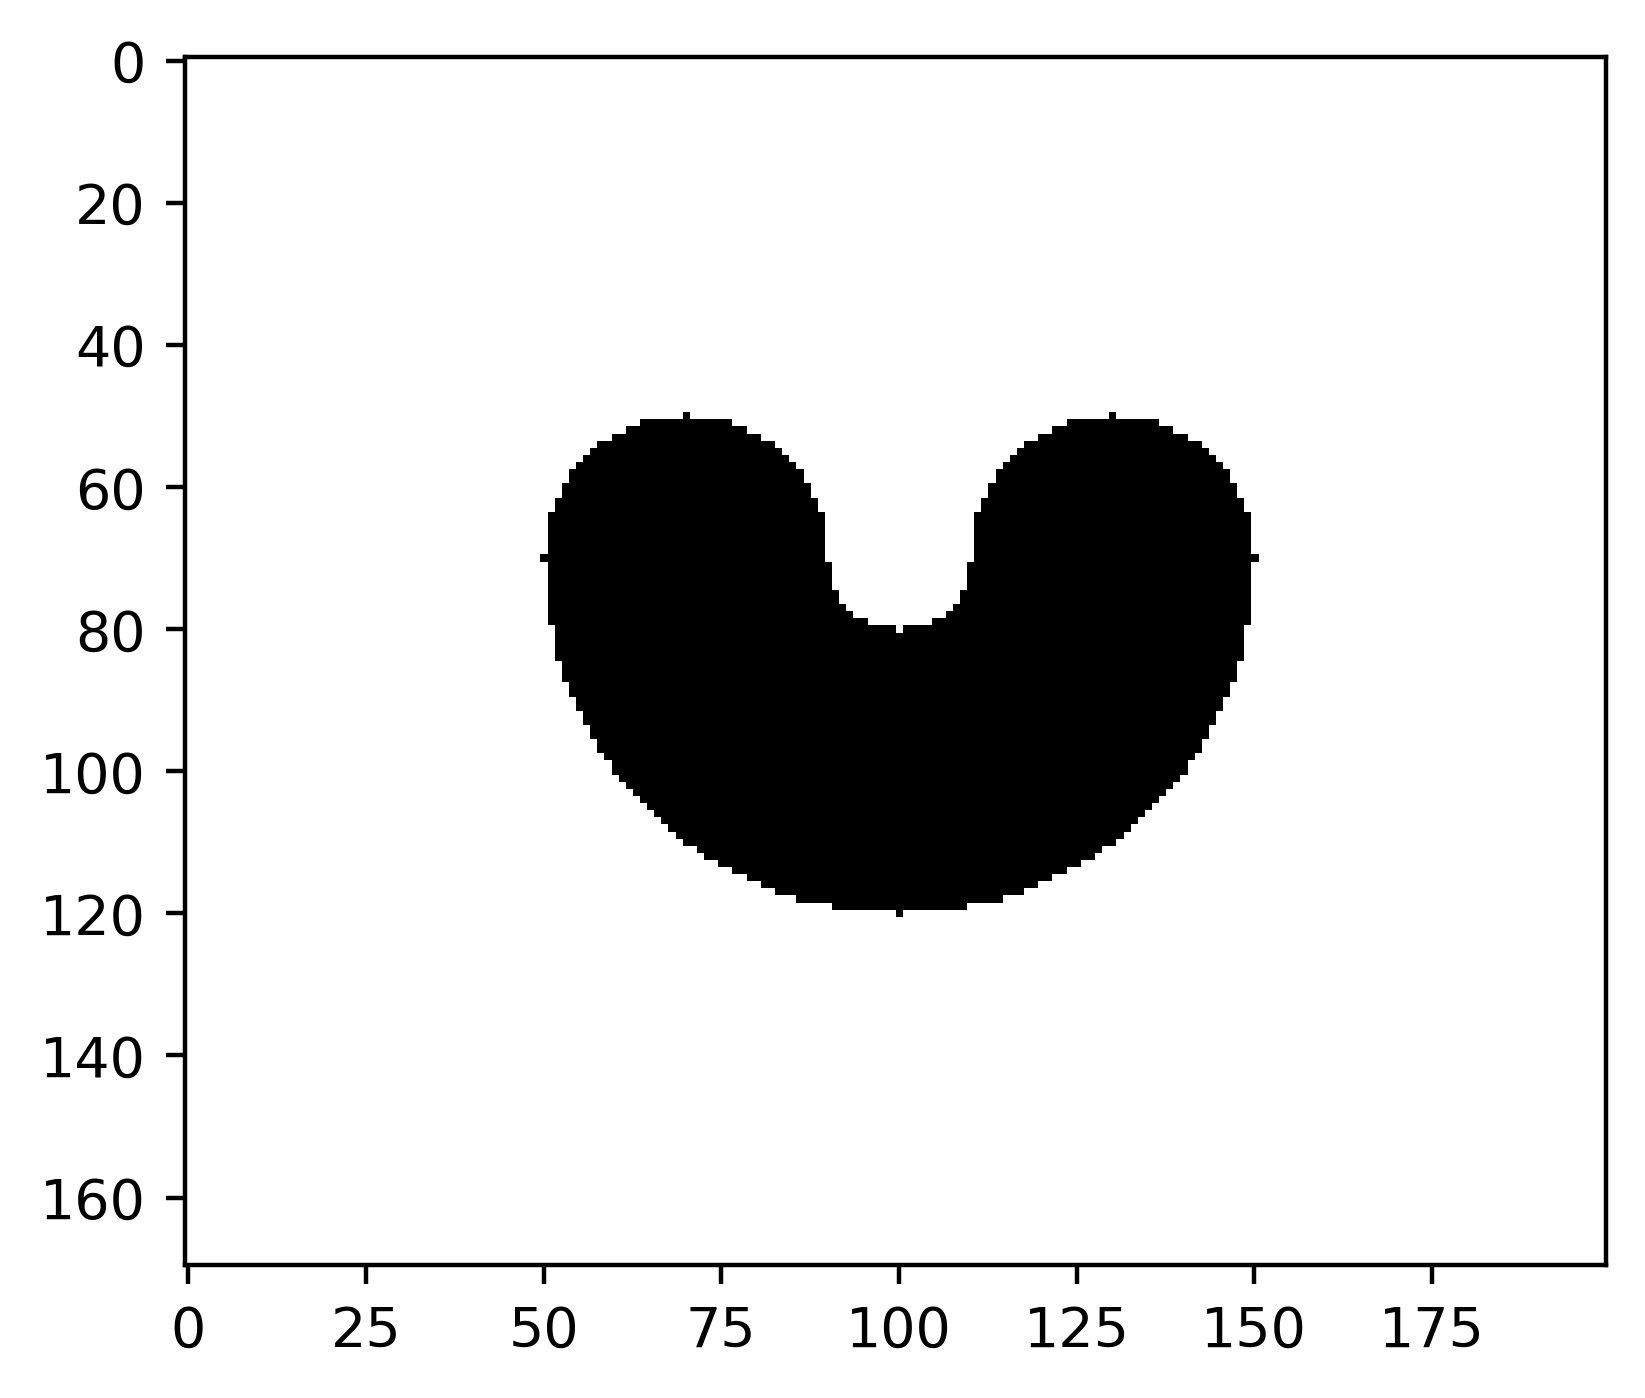

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

%matplotlib inline
mpl.rcParams['figure.dpi']= 400

r = 50
m = int(17 * r / 5)
n = 4 * r

f = np.ones([m, n])


for i in range(m):
    for j in range(n):
        if ((i-7*r/5)**2 + (j-2*r)**2 <= r**2 and i >= 7*r/5):
            f[i][j] = 0  # unterster halbkreis
        if ((i-7*r/5)**2 + (j-7*r/5)**2 <= (2*r/5)**2 and i < 7*r/5):
            f[i][j] = 0  # linker oberer halbkreis
        if ((i-7*r/5)**2 + (j-13*r/5)**2 <= (2*r/5)**2 and i < 7*r/5):
            f[i][j] = 0  # rechter oberer halbkreis
        if ((i-7*r/5)**2 + (j-2*r)**2 <= (r/5)**2 and i >= 7*r/5):
            f[i][j] = 1  # innerer kleinerer halbkreis
    
plt.imshow(f, cmap="gray")

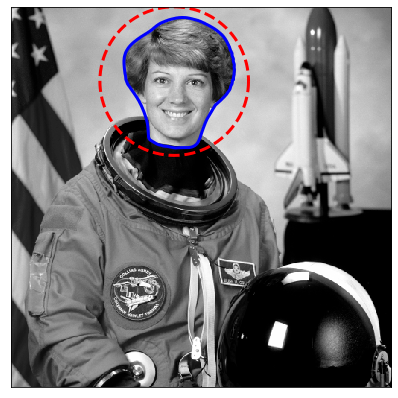

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = data.astronaut()
img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001,
                       coordinates='rc')

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

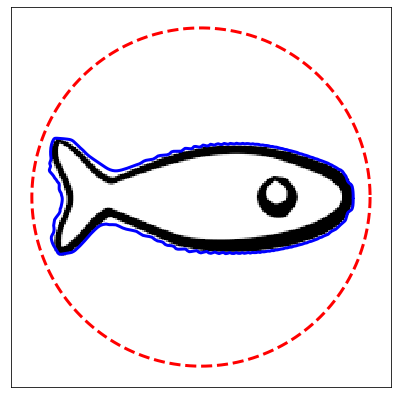

In [3]:
import cv2

img = cv2.imread('img/fish.png')
img = rgb2gray(img)

x, y = img.shape

s = np.linspace(0, 2*np.pi, 400)
r = x/2 + 100*np.sin(s)
c = y/2 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3),
                       init, alpha=0.1, beta=1, gamma=0.001,
                       coordinates='rc')

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()